In [50]:
import pandas
import io
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px

from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [51]:
from scipy import optimize
from scipy.optimize import curve_fit

In [52]:
datos=pd.read_csv('rswIafinal.csv',header=None,names=['p1','p2','p3','a1','a2','a3'])
datos1=pd.read_csv('r1bwIafinal.csv',header=None,names=['p1','p2','p3','a1','a2','a3'])
datos2=pd.read_csv('r2bwIafinal.csv',header=None,names=['p1','p2','p3','a1','a2','a3'])
datos3=pd.read_csv('r3bwIafinal.csv',header=None,names=['p1','p2','p3','a1','a2','a3'])

In [53]:
datos=datos.assign(Falla=1) #sin barras rotas
datos1=datos1.assign(Falla=2) #con 1 barra rota
datos2=datos2.assign(Falla=3) #con 2 barra rota
datos3=datos3.assign(Falla=4) #con 3 barra rota

In [54]:
df=pd.concat([datos,datos1,datos2,datos3],ignore_index=True)
df

,p1,p2,p3,a1,a2,a3,Falla
0,26,75,124,7132.3,873.73,278.37,1
1,26,75,124,7146.9,860.34,279.64,1
2,26,75,124,7165.3,874.07,296.04,1
3,26,75,124,7155.7,901.39,303.15,1
4,26,75,124,7138.1,875.05,288.99,1
...,...,...,...,...,...,...,...
155,26,75,124,7115.5,929.27,292.24,4
156,26,75,124,7049.0,1021.80,275.04,4
157,26,75,124,6952.3,876.26,268.73,4
158,26,75,124,6956.7,845.91,284.01,4


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p1      160 non-null    int64  
 1   p2      160 non-null    int64  
 2   p3      160 non-null    int64  
 3   a1      160 non-null    float64
 4   a2      160 non-null    float64
 5   a3      160 non-null    float64
 6   Falla   160 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.9 KB


In [56]:
df.describe()


,p1,p2,p3,a1,a2,a3,Falla
count,160.0,160.0,160.0,160.000000,160.000000,160.000000,160.000000
mean,26.0,75.0,124.0,7090.060625,899.429562,290.373438,2.500000
std,0.0,0.0,0.0,268.062355,78.758514,45.696892,1.121544
min,26.0,75.0,124.0,6622.700000,779.940000,217.020000,1.000000
25%,26.0,75.0,124.0,6913.400000,841.457500,260.450000,1.750000
50%,26.0,75.0,124.0,7113.200000,872.845000,286.740000,2.500000
75%,26.0,75.0,124.0,7240.400000,957.452500,318.207500,3.250000
max,26.0,75.0,124.0,7504.100000,1090.200000,383.060000,4.000000


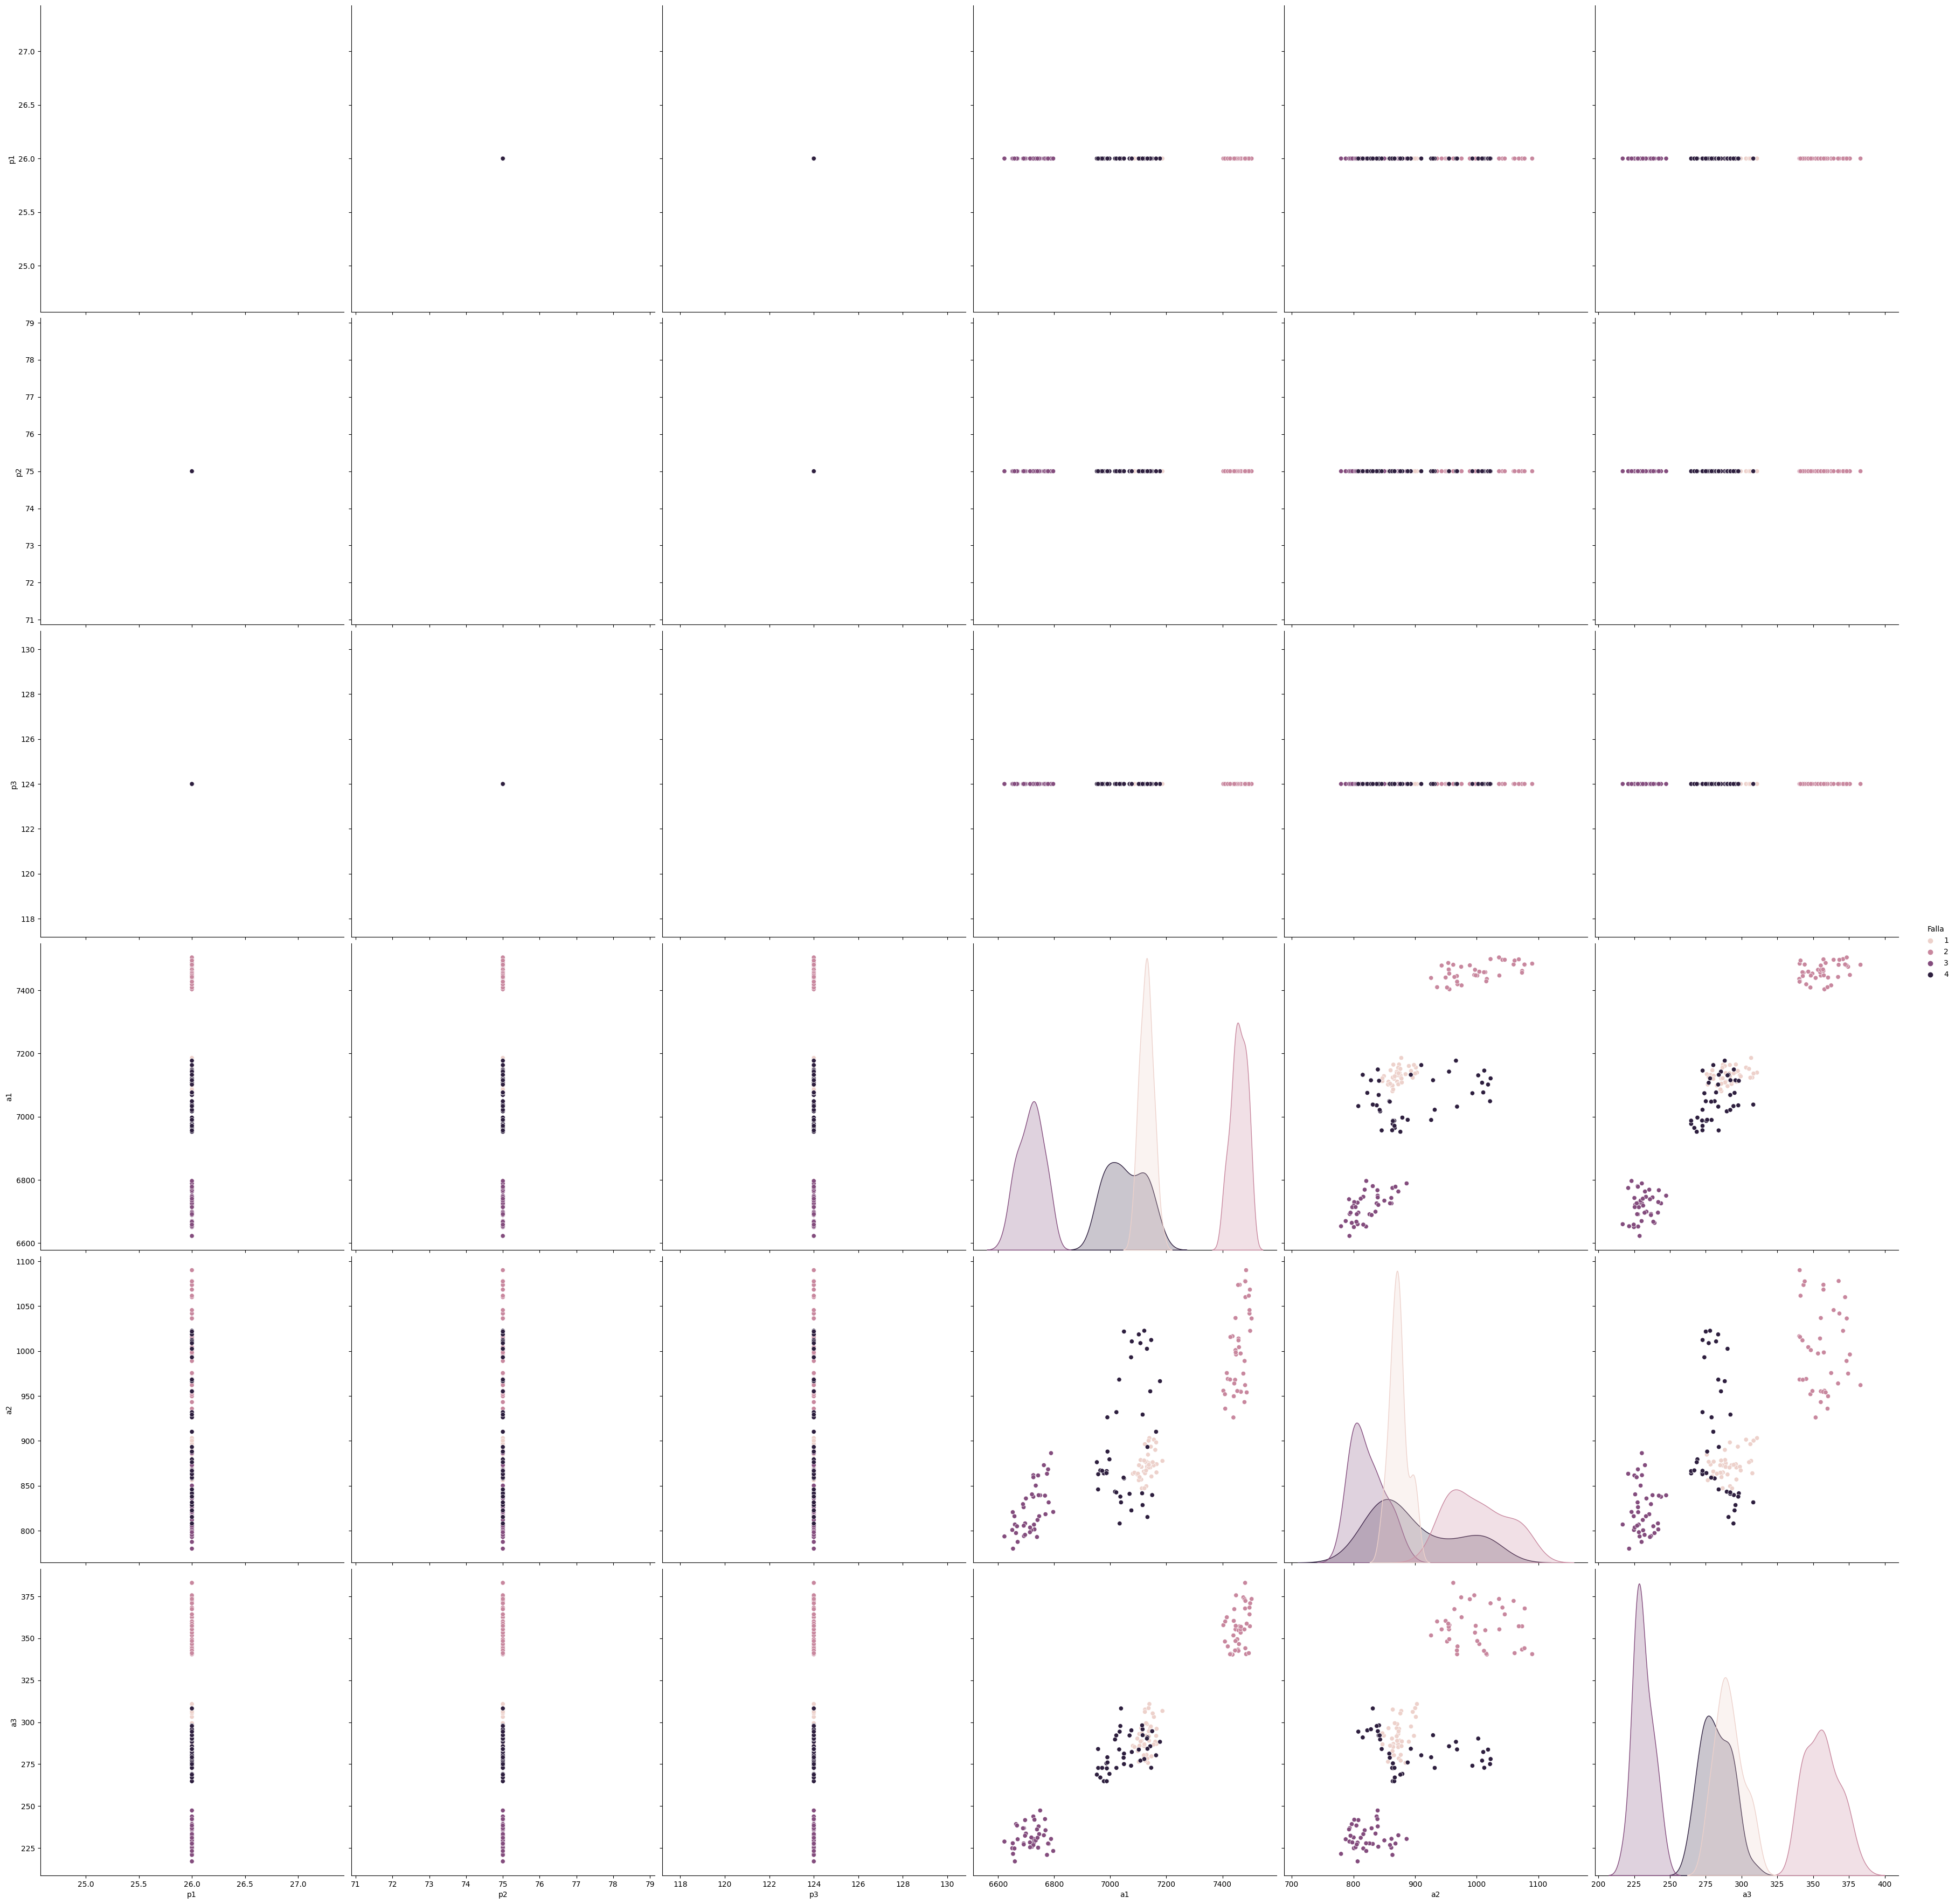

In [57]:
sns.pairplot(df, hue='Falla', height=6)
#plt.savefig('Distribuciones.png',bbox_inches='tight')
plt.show()

In [58]:
y=df['Falla']
y

0      1
1      1
2      1
3      1
4      1
      ..
155    4
156    4
157    4
158    4
159    4
Name: Falla, Length: 160, dtype: int64

In [59]:
x=df[['p1','p2','p3','a1','a2','a3']]
x

,p1,p2,p3,a1,a2,a3
0,26,75,124,7132.3,873.73,278.37
1,26,75,124,7146.9,860.34,279.64
2,26,75,124,7165.3,874.07,296.04
3,26,75,124,7155.7,901.39,303.15
4,26,75,124,7138.1,875.05,288.99
...,...,...,...,...,...,...
155,26,75,124,7115.5,929.27,292.24
156,26,75,124,7049.0,1021.80,275.04
157,26,75,124,6952.3,876.26,268.73
158,26,75,124,6956.7,845.91,284.01


In [60]:
x=df[['a1','a2','a3']]
x

,a1,a2,a3
0,7132.3,873.73,278.37
1,7146.9,860.34,279.64
2,7165.3,874.07,296.04
3,7155.7,901.39,303.15
4,7138.1,875.05,288.99
...,...,...,...
155,7115.5,929.27,292.24
156,7049.0,1021.80,275.04
157,6952.3,876.26,268.73
158,6956.7,845.91,284.01


Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_train1, y_train1) 
prediction = rf.predict(x_test1)

In [63]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.9688644688644689
Precision:  0.9772727272727273
Recall:  0.9642857142857143
Accuracy:  0.96875


In [64]:
confusion_matrix(y_test1, prediction)

array([[10,  0,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  0,  9,  0],
       [ 1,  0,  0,  6]], dtype=int64)

In [65]:
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": rf.feature_importances_}
).sort_values("importance", ascending=False)

In [66]:
feature_importances_df

,feature,importance
0,a1,0.404441
2,a3,0.338497
1,a2,0.257061


SVM

In [67]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [68]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train1,y_train1)
prediction=clf.predict(x_test1)

In [69]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.9356060606060606
Precision:  0.9583333333333334
Recall:  0.9285714285714286
Accuracy:  0.9375


In [70]:
confusion_matrix(y_test1, prediction)

array([[10,  0,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  0,  9,  0],
       [ 2,  0,  0,  5]], dtype=int64)

DTC

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtc= DecisionTreeClassifier(criterion='entropy').fit(x_train1,y_train1)
prediction=dtc.predict(x_test1)

In [73]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.9701754385964914
Precision:  0.96875
Recall:  0.975
Accuracy:  0.96875


In [74]:
confusion_matrix(y_test1, prediction)

array([[9, 0, 0, 1],
       [0, 6, 0, 0],
       [0, 0, 9, 0],
       [0, 0, 0, 7]], dtype=int64)

KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
neigh = KNeighborsClassifier().fit(x_train1,y_train1)
prediction=neigh.predict(x_test1)
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.9688644688644689
Precision:  0.9772727272727273
Recall:  0.9642857142857143
Accuracy:  0.96875


In [77]:
confusion_matrix(y_test1, prediction)

array([[10,  0,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  0,  9,  0],
       [ 1,  0,  0,  6]], dtype=int64)

K fold

In [78]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=100,shuffle=True)
kf

KFold(n_splits=10, random_state=100, shuffle=True)

In [79]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_entrenamiento,y_entrenamiento)
    y_pred=rf.predict(x_prueba)
    
    #plot_confusion_matrix(rf, x_prueba, y_prueba) 
    #plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.9529914529914529
Precision:  0.9642857142857143
Recall:  0.95
Accuracy:  0.9375
--------------------------
F1:  0.9000000000000001
Precision:  0.8999999999999999
Recall:  0.8999999999999999
Accuracy:  0.875
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.9444444444444444
Precision:  0.95
Recall:  0.95
Accuracy:  0.9375
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------


In [80]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    clf = make_pipeline(StandardScaler(), SVC(C=3,gamma='auto')).fit(x_entrenamiento,y_entrenamiento)
    y_pred=clf.predict(x_prueba)
       
    #plot_confusion_matrix(clf, x_prueba, y_prueba) 
    #plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.9529914529914529
Precision:  0.9642857142857143
Recall:  0.95
Accuracy:  0.9375
--------------------------
F1:  0.8351648351648352
Precision:  0.90625
Recall:  0.85
Accuracy:  0.8125
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.9444444444444444
Precision:  0.95
Recall:  0.95
Accuracy:  0.9375
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------


In [81]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    dtc= DecisionTreeClassifier(criterion='entropy').fit(x_entrenamiento,y_entrenamiento)
    y_pred=dtc.predict(x_prueba)
       
    #plot_confusion_matrix(dtc, x_prueba, y_prueba) 
    #plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.9307692307692307
Precision:  0.9642857142857143
Recall:  0.9166666666666666
Accuracy:  0.9375
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.8958333333333333
Precision:  0.9285714285714286
Recall:  0.9
Accuracy:  0.875
--------------------------


F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.9444444444444444
Precision:  0.95
Recall:  0.95
Accuracy:  0.9375
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.9285714285714286
Precision:  0.9375
Recall:  0.9375
Accuracy:  0.9375
--------------------------


In [82]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    neigh = KNeighborsClassifier().fit(x_entrenamiento,y_entrenamiento)
    y_pred=neigh.predict(x_prueba)
       
    #plot_confusion_matrix(neigh, x_prueba, y_prueba) 
    #plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------


F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.9017857142857143
Precision:  0.9375
Recall:  0.9
Accuracy:  0.875
--------------------------
F1:  0.8351648351648352
Precision:  0.90625
Recall:  0.85
Accuracy:  0.8125
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  0.9444444444444444
Precision:  0.95
Recall:  0.95
Accuracy:  0.9375
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
F1:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
--------------------------
